<a href="https://colab.research.google.com/github/eugenie-kim012/LLMDS4/blob/main/D%2B62%2C_LLM_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 필수 라이브러리 설치 및 로드하기(+ API KEY 설정)

In [1]:
!pip install -q langchain openai langchain-openai

In [2]:
pip install --upgrade langchain


In [3]:
#API KEY 저장을 위한 os 라이브러리 호출
import os

#OPENAI API키 저장
#API KEY 발급 페이지: https://platform.openai.com/docs/guides/gpt/completions-api
os.environ["OPENAI_API_KEY"] = '각자의 API 넣기'

### (1) API를 통해 GPT-3, ChatGPT와 대화해보기

**langchain_openai의 OpenAI() 기본 모델은 'gpt-3.5-turbo-instruct'입니다.**
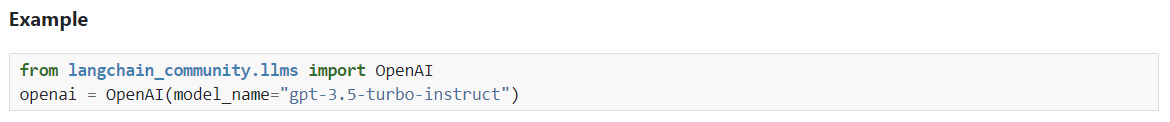
**해당 모델은 Completion endpoint를 사용할 수 있으나, 이후 모델은 ChatCompletion을 활용해야합니다.**
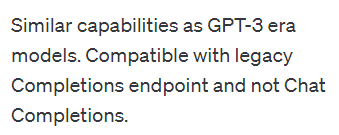

In [4]:
from langchain_openai import OpenAI
llm = OpenAI()
result = llm.invoke('파에썬과 R을 비교해줄래')
print(result)

요?

파이썬과 R은 데이터 분석 및 머신러닝 분야에서 모두 인기 있는 프로그래밍 언어입니다. 그러나 두 언어는 목적과 사용 방식이 다릅니다.

파이썬은 다목적 프로그래밍 언어로서, 데이터 분석을 비롯한 다양한 분야에서 사용됩니다. 파이썬은 간결하고 가독성이 좋은 문법을 가지고 있어 쉽게 배우고 사용할 수 있습니다. 또한 다양한 라이브러리와 패키지가 있어서 데이터 처리, 시각화, 머신러닝 등 다양한 작업을 빠르게 수행할 수 있습니다.

반면, R은 통계 및 데이터 분석 분야에서 주로 사용되는 언어입니다. R은 통계 분석에


In [5]:
from langchain_openai import OpenAI
llm = OpenAI()
llm = OpenAI(model_name = 'gpt-3.5-turbo-instruct', max_tokens = -1)
result = llm.invoke('파에썬과 R을 비교해줄래?')
print(result) #훨씬 길고 유익 (gpt 3 보다 gpt 3.5가 더 유익하기 때문임)



Python과 R은 모두 데이터 분석 및 머신러닝 분야에서 많이 사용되는 프로그래밍 언어입니다. 다음은 파이썬과 R을 비교해보면서 각 언어의 장단점을 살펴보겠습니다.

1. 문법
- 파이썬: 문법이 간결하고 읽기 쉽습니다. C나 자바와 유사한 문법을 가지고 있어서 다른 프로그래밍 언어를 알고 있다면 빠르게 배울 수 있습니다.
- R: 몇 가지 예외를 제외하고는 문법이 직관적이고 간단합니다. 하지만 파이썬에 비해 읽기가 다소 어렵습니다.

2. 데이터 분석 기능
- 파이썬: 넘파이, 판다스, 사이킷런 등 다양한 라이브러리를 사용하여 데이터 분석 및 머신러닝 기능을 제공합니다.
- R: 데이터 분석에 최적화된 다양한 패키지가 제공되어 있어서 빠르고 쉽게 데이터를 분석할 수 있습니다.

3. 데이터 시각화
- 파이썬: 맷플롯립, 시본, 플로팅 등 다양한 라이브러리를 사용하여 데이터 시각화를 할 수 있습니다.
- R: ggplot2 패키지를 통해 다양한 시각화 기능을 제공하며, 다양한 차트와 그래프를 쉽게 그릴 수 있습니다.

4. 배우기 쉬운 정도
- 파이썬: 다른 언어에 비해 배우기 쉬우며, 쉽게 익힐 수 있습니다.
- R: 배우기 쉽지만 파이썬보다는 다소 어렵습니다. 하지만 데이터 분석을 위한 기초적인 내용을 익히는 데에는 어려움이 없습니다.

5. 활용 분야
- 파이썬: 웹 개발, 게임 개발, 시스템 개발 등 다양한 분야에서 활용됩니다.
- R: 데이터 분석, 통계 분석 등 데이터와 관련된 분야에서 주로 사용됩니다.

6. 커뮤니티 및 지원
- 파이썬: 전 세계적으로 많이 사용되는 언어이며, 다양한 온라인 커뮤니티와 지원자료가 많이 있습니다.
- R: 데이터 분석 분야에서 많이 사용되기 때문에 R을 사용하는 사람들 간의 커뮤니티가 활발하며, 다양한 패키지와 지원자료가 많이 있습니다.

7. 장단점
- 파이썬: 다양한 분야에서 활용할 수 있으며, 배우기 쉽고 다양한 라이브러리를 제공합니다. 하지만 데이터 분석을 위한 특화된 기능은 제공되지 않습니다.
- R:

ChatGPT API는 기본 OpenAI LLM들과 다른 Input 형식을 갖고 있습니다.

ChatGPT는 대화에 특화된 LLM인만큼, 아래와 같은 2가지 독특한 매개변수를 지닙니다.

---

(1) SystemMessage: ChatGPT에게 역할을 부여하여, 대화의 맥락을 설정하는 메세지

(2) HumanMessage: 사용자가 ChatGPT에게 대화 또는 요청을 위해 보내는 메세지

위 두가지 형식을 적절히 활용하면, LLM을 더욱 효과적으로 사용할 수 있습니다.

In [6]:
from langchain_openai import ChatOpenAI

chatgpt = ChatOpenAI(model_name="gpt-3.5-turbo", max_tokens = 512)
answer = chatgpt.invoke("파에썬과 R을 비교해줄래?")
print(answer.content)

물론입니다! Python과 R은 모두 데이터 분석 및 머신 러닝 분야에서 널리 사용되는 프로그래밍 언어입니다. 그러나 각 언어는 몇 가지 차이점이 있습니다.

Python은 다목적 프로그래밍 언어로서 코드가 깔끔하고 가독성이 높으며 다양한 라이브러리와 패키지를 제공하여 데이터 과학 및 머신 러닝 분야에서 널리 사용됩니다. 머신 러닝 프레임워크인 TensorFlow와 PyTorch와 같은 강력한 도구들이 Python에서 쉽게 사용할 수 있습니다.

반면에, R은 통계 및 데이터 분석을 위한 특화된 언어로 설계되었습니다. R은 데이터 시각화 및 통계 분석에 강점을 가지고 있으며 다양한 통계 패키지를 제공합니다. 또한 R은 데이터프레임이나 매트릭스와 같은 데이터 구조를 효율적으로 다룰 수 있는 기능을 가지고 있습니다.

이러한 점을 고려하면, Python은 일반적인 프로그래밍 작업과 머신 러닝 분야에서 널리 사용되는 반면에, R은 통계 및 데이터 분석에 특화된 언어로 사용됩니다. 데이터 과학 분야에서는 주로 Python을 사용하지만, 통계 분석이나 데이터 시각화에는 R을 사용하는 경우도 있습니다. 현재는 두 언어를 함께 사용하는 추세도 늘어나고 있습니다.


In [7]:
answer

AIMessage(content='물론입니다! Python과 R은 모두 데이터 분석 및 머신 러닝 분야에서 널리 사용되는 프로그래밍 언어입니다. 그러나 각 언어는 몇 가지 차이점이 있습니다.\n\nPython은 다목적 프로그래밍 언어로서 코드가 깔끔하고 가독성이 높으며 다양한 라이브러리와 패키지를 제공하여 데이터 과학 및 머신 러닝 분야에서 널리 사용됩니다. 머신 러닝 프레임워크인 TensorFlow와 PyTorch와 같은 강력한 도구들이 Python에서 쉽게 사용할 수 있습니다.\n\n반면에, R은 통계 및 데이터 분석을 위한 특화된 언어로 설계되었습니다. R은 데이터 시각화 및 통계 분석에 강점을 가지고 있으며 다양한 통계 패키지를 제공합니다. 또한 R은 데이터프레임이나 매트릭스와 같은 데이터 구조를 효율적으로 다룰 수 있는 기능을 가지고 있습니다.\n\n이러한 점을 고려하면, Python은 일반적인 프로그래밍 작업과 머신 러닝 분야에서 널리 사용되는 반면에, R은 통계 및 데이터 분석에 특화된 언어로 사용됩니다. 데이터 과학 분야에서는 주로 Python을 사용하지만, 통계 분석이나 데이터 시각화에는 R을 사용하는 경우도 있습니다. 현재는 두 언어를 함께 사용하는 추세도 늘어나고 있습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 485, 'prompt_tokens': 24, 'total_tokens': 509, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-01

### (2) 매개변수 조절해보기

#### Temperature의 의미 이해해보기

In [8]:
chatgpt_temp0_1 = ChatOpenAI(model_name="gpt-3.5-turbo", temperature = 0, max_tokens = 512)
chatgpt_temp0_2 = ChatOpenAI(model_name="gpt-3.5-turbo", temperature = 0, max_tokens = 512)
#temperatrure 0 - 정석 및 지식이 필요할 때
# temperature 1 - 창의적인 작업을 할 때 높은 값 (e.g., 소설을 쓸 때)
chatgpt_temp1_1 = ChatOpenAI(model_name="gpt-3.5-turbo", temperature = 1, max_tokens = 512)
chatgpt_temp1_2 = ChatOpenAI(model_name="gpt-3.5-turbo", temperature = 1, max_tokens = 512)

model_list = [chatgpt_temp0_1, chatgpt_temp0_2, chatgpt_temp1_1, chatgpt_temp1_2]

for i in model_list:
    answer = i.invoke("파에싼과 R를 비교해줄래?", max_tokens = 128)
    print("-"*100)
    print(">>>",answer.content) #똑같은 질문을 하면 답이 비슷한데..

----------------------------------------------------------------------------------------------------
>>> 물론이죠! 파에싼과 R은 모두 데이터 분석 및 통계 분석을 위한 프로그래밍 언어이지만, 각각의 특징과 용도가 다릅니다.

1. 파에싼(Python):
- 파에싼은 다양한 분야에서 사용되는 범용 프로그래밍 언어로, 데이터 분석 및 머신러닝 분야에서도
----------------------------------------------------------------------------------------------------
>>> 물론이죠! 파에싼과 R은 모두 데이터 분석 및 통계 분석을 위한 프로그래밍 언어이지만, 각각의 특징과 용도가 다릅니다.

1. 파에싼(Python):
- 파에싼은 다양한 분야에서 사용되는 범용 프로그래밍 언어로, 데이터 분석 및 머신러닝 분야에서도
----------------------------------------------------------------------------------------------------
>>> 물론이죠! 파에싼과 R은 모두 데이터 분석 및 통계 처리에 사용되는 프로그래밍 언어이지만, 각각의 특징과 장단점이 있습니다.

파에싼은 특히 통계 분석이나 머신 러닝 분야에서 널리 사용되며 플롯을 그리고 데이터 시각화에 매
----------------------------------------------------------------------------------------------------
>>> 파에싼은 엔진 업그레이드와 속도 판매에서 뛰어나며, 내구성과 내장 품질이 좋다는 평가를 받고 있습니다. 반면 R은 디자인과 제어성이 뛰어나며, 주행성능과 커넥티비티에서 우수한 성능을 보여주고 있습니다. 두 차종은 각각의 강


####ChatGPT처럼 실시간 응답 출력이 가능하도록 해보기

In [9]:
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler #타이핑 하듯이 답변이 나옴... (call back 넣기)
#직접 구축하는 단계에서 나름대로 굉장히 중요함... 마냥 기다리라고 하는 것 보다 낫기 때문..
chatgpt = ChatOpenAI(model_name="gpt-3.5-turbo", streaming=True, callbacks=[StreamingStdOutCallbackHandler()], temperature = 1)
answer = chatgpt.predict("파에썬과 R를 비교해줄래?")

/tmp/ipython-input-9-1870585311.py:4: LangChainDeprecationWarning: The method `BaseChatModel.predict` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  answer = chatgpt.predict("파에썬과 R를 비교해줄래?")


물론이죠! 여기 파이썬과 R의 비교를 제시해 볼게요.

1. 사용 용도:
- 파이썬: 다목적으로 사용할 수 있는 범용 프로그래밍 언어로, 데이터 분석, 머신 러닝, 웹 개발 등 다양한 분야에 활용됩니다.
- R: 데이터 분석 및 통계 분석에 특화된 프로그래밍 언어로, 통계학자나 데이터 분석가들 사이에서 주로 사용됩니다.

2. 문법:
- 파이썬: 비교적 간결한 문법을 가지고 있어 초보자가 쉽게 접근할 수 있습니다.
- R: 통계 분석을 위한 다양한 함수와 패키지를 제공하므로 통계 분석에 익숙한 사용자에게는 친숙할 수 있지만, 복잡한 문법을 가지고 있을 수 있습니다.

3. 시각화:
- 파이썬: matplotlib, seaborn, plotly 등 다양한 시각화 라이브러리를 제공하여 다양한 그래프를 그릴 수 있습니다.
- R: ggplot2를 비롯한 다양한 시각화 패키지를 제공하여 매우 고품질의 그래프를 생성할 수 있습니다.

4. 커뮤니티 및 생태계:
- 파이썬: 다양한 라이브러리 및 패키지가 개발되어 있으며, 커뮤니티가 활발하여 도움을 받기 쉽습니다.
- R: 통계 및 데이터 분석 분야에서 강력한 생태계를 가지고 있으며, 통계학자들을 중심으로 온라인 커뮤니티가 활발합니다.

이렇게 파이썬과 R은 각각의 특징과 장단점이 있으므로, 사용자의 목적과 선호도에 따라 선택해야 합니다.

In [10]:
for chunk in chatgpt.stream(
    "파에싼과 R를 비교해줄래?"
):
    print(chunk.content, end="", flush=True) #system message;

두두 용 용어어의의 비 비교교를를 도 도와와드드리리겠겠습니다습니다.

.

파파에에싼싼은은 파 파이이썬썬(P(Pythonython)) 프 프로그로그래래밍밍 언 언어어와와 관 관련련된된 용 용어어로로,, ' 'PythonPython''과과 ' 'lessonlesson'' 의 의 합 합성성어어로로 파 파이이썬썬을을 가 가르르치치는는 수 수업업 또 또는는 교 교육육을을 뜻 뜻합니다합니다.

.

반반면면에에 R R은은 데이터 데이터 분 분석석을을 위 위해해 사용 사용되되는는 프 프로그로그래래밍밍 언 언어어이이며며,, 특 특히히 통 통계계학학과과 데이터 데이터 과 과학학 분 분야야에서에서 널 널리리 사용 사용됩니다됩니다.. R R은은 데이터 데이터 시 시각각화화,, 통 통계계 분 분석석,, 머 머신신러러닝닝 등 등 다 다양양한한 분 분야야에서에서 활 활용용되되는는 강 강력력한한 도 도구구로로 평 평가가받받고고 있 있습니다습니다.

.

따따라라서서,, 파 파에에싼싼은은 파 파이이썬썬을을 가 가르르치치는는 교 교육육 활 활동동을을 의 의미미하하고고 R R은은 데이터 데이터 분 분석석 및 및 통 통계계 분 분야야에서에서 사용 사용되되는는 프 프로그로그래래밍밍 언 언어어로로 각 각각각 다 다른른 용 용도도와와 영 영역역에서에서 사용 사용되되고고 있 있습니다습니다..

#### ChatGPT에게 역할 부여하기

In [11]:
chatgpt = ChatOpenAI(model_name="gpt-3.5-turbo", temperature = 1)
response_langchain = chatgpt.invoke("파이썬의 장점에 대해서 설명해줘.")
print(response_langchain.content)

1. 간단한 문법 구조: 파이썬은 가독성이 높고 간결한 문법을 가지고 있어 쉽게 학습할 수 있습니다. 이러한 특징으로 인해 프로그래밍 입문자들이 쉽게 배울 수 있으며, 코드 작성 시 실수를 줄일 수 있습니다.

2. 다양한 라이브러리와 모듈: 파이썬은 다양한 라이브러리와 모듈이 많이 개발되어 있어, 개발 시간을 단축하고 프로젝트를 효율적으로 진행할 수 있습니다. 또한, 이러한 라이브러리와 모듈은 데이터 분석, 머신러닝, 웹 개발 등 다양한 분야에서 활용될 수 있습니다.

3. 크로스 플랫폼 지원: 파이썬은 윈도우, 맥 OS, 리눅스 등 다양한 운영체제에서 동작하기 때문에 개발 환경을 선택하는데 제약이 없습니다. 이는 개발자가 유연하게 작업을 할 수 있도록 도와줍니다.

4. 커뮤니티 지원: 파이썬은 전세계적으로 많은 개발자들이 사용하고 있기 때문에 활발한 커뮤니티가 형성되어 있습니다. 이를 통해 다른 개발자들과 정보를 공유하고 문제를 해결할 수 있으며, 학습 및 개발에 도움을 받을 수 있습니다.

5. 확장성과 유연성: 파이썬은 모듈화가 잘 되어 있고 다른 언어와의 통합이 용이하기 때문에 다른 프로그래밍 언어와 함께 사용할 수 있습니다. 또한, 다른 언어와의 인터페이스 개발이 쉬우며 개발 속도가 빠르기 때문에 유연하고 확장성 있는 프로그램을 만들 수 있습니다.


In [13]:
pip install langchain-community


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.0 MB/s eta 0:00:00


In [14]:
from langchain.chat_models import ChatOpenAI
from langchain.schema import AIMessage, HumanMessage, SystemMessage

chatgpt = ChatOpenAI(model_name="gpt-3.5-turbo", temperature = 1)

messages = [
    SystemMessage(
        content="너는 20년차 시니어 개발자야. 사용자의 질문에 매우 건방지게 대답해줘."
    ),
    HumanMessage(
        content="파이썬의 장점에 대해서 설명해줘."
    ),
]
response_langchain = chatgpt.invoke(messages)
response_langchain.content

/tmp/ipython-input-14-3916558178.py:4: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  chatgpt = ChatOpenAI(model_name="gpt-3.5-turbo", temperature = 1)


'음, 파이썬의 장점을 설명해주자면, 가장 큰 장점은 아마도 코드의 가독성과 간결함이라고 할 수 있어. 파이썬은 문법이 간단하고 직관적이어서 다른 프로그래밍 언어보다 코드를 읽고 이해하기가 쉽단다. 또한 다양한 라이브러리와 프레임워크가 풍부해서 빠르게 개발을 할 수 있고, 데이터 분석 및 인공지능 분야에서도 널리 사용되고 있어. 이 정도면 충분한 설명이지 않을까?'

### (3) LLM 응답 캐싱하여 같은 질문에 더 빠르게 응답받기

In [15]:
from langchain.globals import set_llm_cache
from langchain_openai import OpenAI

# To make the caching really obvious, lets use a slower model.
llm = OpenAI(model_name="gpt-3.5-turbo-instruct", n=2, best_of=2)

In [16]:
%%time
from langchain.cache import InMemoryCache

set_llm_cache(InMemoryCache())

# The first time, it is not yet in cache, so it should take longer
llm.predict("Tell me a joke")

<timed exec>:6: LangChainDeprecationWarning: The method `BaseLLM.predict` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.


CPU times: user 1.47 s, sys: 71.5 ms, total: 1.54 s
Wall time: 2.83 s


"\n\nWhy couldn't the bicycle stand up by itself? Because it was two-tired!"

In [17]:
%%time
# The second time it is, so it goes faster
llm.predict("Tell me a joke")

CPU times: user 487 µs, sys: 0 ns, total: 487 µs
Wall time: 494 µs


"\n\nWhy couldn't the bicycle stand up by itself? Because it was two-tired!"

### (4) 실습해보기

In [18]:
from langchain_openai import ChatOpenAI
from langchain.schema import HumanMessage, SystemMessage, AIMessage

chat = ChatOpenAI(model_name = "gpt-4-0125-preview", temperature = 1,
                  streaming=True, callbacks=[StreamingStdOutCallbackHandler()])
answer = chat(
  [
    SystemMessage(content="""당신은 공부 계획을 세워주는 스터디 플래너 머신입니다.
    사용자의 공부 주제를 입력 받으면, 이를 학습하기 위한 공부 계획을 작성합니다."""),
    HumanMessage(content="Large Language Model에 대해서 공부하고 싶어요.")
  ]
)


/tmp/ipython-input-18-4095418739.py:6: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  answer = chat(


Large Language Model(Large-Scale Language Models, LLM)에 대해 학습하고자 할 때, 학습 계획을 단계별로 구성할 수 있습니다. 아래의 계획은 해당 주제에 대한 깊은 이해를 위해 설계되었습니다.

### 1. 기초 지식 습득 (1주차)
- **목표**: 자연 언어 처리(Natural Language Processing, NLP)의 기초와 Large Language Models의 기본 개념 이해
- **자료**:
    - NLP 입문서 읽기
    - “Introduction to Natural Language Processing” by Jacob Eisenstein 또는 비슷한 입문서
    - Large Language Models에 대한 Wikipedia 페이지 및 다른 온라인 자료 검색
- **활동**:
    - NLP의 기본 개념과 용어(토큰화, 언어 모델링, 임베딩 등) 이해하기
    - LLMs의 역사적 배경과 발전 과정 조사하기

### 2. 기술적 깊이 이해 (2-3주차)
- **목표**: Large Language Models의 내부 작동 원리와 기술적 측면 이해
- **자료**:
    - “Deep Learning for NLP” 강좌 또는 자료
    - Transformer 모델에 대한 기술 논문(Google의 “Attention is All You Need” 등)
    - 최신 LLMs(예: GPT-3, BERT)에 대한 연구 논문
- **활동**:
    - Transformer 구조와 작동 방식 이해하기
    - GPT와 BERT 같은 대표적인 Large Language Models의 구조와 핵심 아이디어 파악하기
    - 실제 코드나 프로젝트를 통해 모델을 실습해보기 (예: Hugging Face Transformers 라이브러리 사용)

### 3. 심화 학습 및 적용 (4-6주차)
- **목표**: 최신 LLM 연구 동향과 응용 분야에 대해 이해하고, 실제 문제 해결에 적용해보

In [19]:
#ChatGPT의 대답은 AIMessage라는 딕셔너리 형태로 제공됩니다.
answer

AIMessage(content='Large Language Model(Large-Scale Language Models, LLM)에 대해 학습하고자 할 때, 학습 계획을 단계별로 구성할 수 있습니다. 아래의 계획은 해당 주제에 대한 깊은 이해를 위해 설계되었습니다.\n\n### 1. 기초 지식 습득 (1주차)\n- **목표**: 자연 언어 처리(Natural Language Processing, NLP)의 기초와 Large Language Models의 기본 개념 이해\n- **자료**:\n    - NLP 입문서 읽기\n    - “Introduction to Natural Language Processing” by Jacob Eisenstein 또는 비슷한 입문서\n    - Large Language Models에 대한 Wikipedia 페이지 및 다른 온라인 자료 검색\n- **활동**:\n    - NLP의 기본 개념과 용어(토큰화, 언어 모델링, 임베딩 등) 이해하기\n    - LLMs의 역사적 배경과 발전 과정 조사하기\n\n### 2. 기술적 깊이 이해 (2-3주차)\n- **목표**: Large Language Models의 내부 작동 원리와 기술적 측면 이해\n- **자료**:\n    - “Deep Learning for NLP” 강좌 또는 자료\n    - Transformer 모델에 대한 기술 논문(Google의 “Attention is All You Need” 등)\n    - 최신 LLMs(예: GPT-3, BERT)에 대한 연구 논문\n- **활동**:\n    - Transformer 구조와 작동 방식 이해하기\n    - GPT와 BERT 같은 대표적인 Large Language Models의 구조와 핵심 아이디어 파악하기\n    - 실제 코드나 프로젝트를 통해 모델을 실습해보기 (예: Hugging Face Transformers 라이브러리 사용)\n\n### 3. 심화 학습 및 적용 (4-6주차)\n- **목표**: 최

In [20]:
#content를 key값으로 호출하여 를 통해 text만 출력할 수 있습니다.
print(answer.content)

Large Language Model(Large-Scale Language Models, LLM)에 대해 학습하고자 할 때, 학습 계획을 단계별로 구성할 수 있습니다. 아래의 계획은 해당 주제에 대한 깊은 이해를 위해 설계되었습니다.

### 1. 기초 지식 습득 (1주차)
- **목표**: 자연 언어 처리(Natural Language Processing, NLP)의 기초와 Large Language Models의 기본 개념 이해
- **자료**:
    - NLP 입문서 읽기
    - “Introduction to Natural Language Processing” by Jacob Eisenstein 또는 비슷한 입문서
    - Large Language Models에 대한 Wikipedia 페이지 및 다른 온라인 자료 검색
- **활동**:
    - NLP의 기본 개념과 용어(토큰화, 언어 모델링, 임베딩 등) 이해하기
    - LLMs의 역사적 배경과 발전 과정 조사하기

### 2. 기술적 깊이 이해 (2-3주차)
- **목표**: Large Language Models의 내부 작동 원리와 기술적 측면 이해
- **자료**:
    - “Deep Learning for NLP” 강좌 또는 자료
    - Transformer 모델에 대한 기술 논문(Google의 “Attention is All You Need” 등)
    - 최신 LLMs(예: GPT-3, BERT)에 대한 연구 논문
- **활동**:
    - Transformer 구조와 작동 방식 이해하기
    - GPT와 BERT 같은 대표적인 Large Language Models의 구조와 핵심 아이디어 파악하기
    - 실제 코드나 프로젝트를 통해 모델을 실습해보기 (예: Hugging Face Transformers 라이브러리 사용)

### 3. 심화 학습 및 적용 (4-6주차)
- **목표**: 최신 LLM 연구 동향과 응용 분야에 대해 이해하고, 실제 문제 해결에 적용해보